# MobileNet - Test

In [1]:
from tensorflow.keras import layers, models, applications
from tensorflow.keras.applications import mobilenet
from tensorflow.keras.utils import Sequence
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.utils import shuffle

import cv2


In [2]:
# @title 모델 생성
model = applications.MobileNetV2()
model.summary()


14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [3]:
base_model = applications.MobileNetV2(
    input_shape=(128, 128, 3),
    include_top=False,
    weights='imagenet'
)

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(1024, activation='relu', kernel_initializer='he_normal')(x)
x = layers.Dropout(0.3)(x)
output = layers.Dense(11, activation='softmax')(x)

model = models.Model(base_model.input, output)
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 64, 64, 32)     │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 64, 64, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 64, 64, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 64, 64, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 64, 64, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 64, 64, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 64, 64, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 64, 64, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 64, 64, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 64, 64, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 64, 64, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 65, 65, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 32, 32, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 3,581,003 (13.66 MB)

 Trainable params: 3,546,891 (13.53 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [4]:
# @title 데이터 준비

# https://drive.google.com/file/d/1NHitwWjl9hiFmNNXuweRX8Q6CQi4Pkjk/view?usp=sharing

import gdown, zipfile, os

file_id = '1NHitwWjl9hiFmNNXuweRX8Q6CQi4Pkjk'
output = 'file.zip'

gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)

output_dir = 'cloud'
os.makedirs(output_dir, exist_ok=True)

with zipfile.ZipFile(output, 'r') as z:
  z.extractall(output_dir)

Downloading...
From (original): https://drive.google.com/uc?id=1NHitwWjl9hiFmNNXuweRX8Q6CQi4Pkjk
From (redirected): https://drive.google.com/uc?id=1NHitwWjl9hiFmNNXuweRX8Q6CQi4Pkjk&confirm=t&uuid=89c38720-10af-41b5-8c23-f92a460b40f7
To: /content/file.zip
100%|██████████| 97.7M/97.7M [00:01<00:00, 55.3MB/s]


In [5]:
# @title 메타데이터 생성
from sklearn.model_selection import train_test_split

def load_data(base_dir='cloud'):
  images = []
  labels = []
  class_names = []

  train_base = os.path.join(base_dir, 'data', 'train')

  for class_name in os.listdir(train_base):
    class_name_path = os.path.join(train_base, class_name)

    # 디렉토리인 경우만
    if os.path.isdir(class_name_path):
      for image_name in os.listdir(class_name_path):
        image_path = os.path.join(class_name_path, image_name)
        images.append(image_path)
        labels.append(class_name)

  return np.array(images), np.array(labels)

images, labels = load_data()
print(images.shape, labels.shape)
print(images[:5], labels[:5])
type(images), type(labels)

(2184,) (2184,)
['cloud/data/train/Cc/Cc-N004.jpg' 'cloud/data/train/Cc/Cc-N040.jpg'
 'cloud/data/train/Cc/Cc-N068.jpg' 'cloud/data/train/Cc/Cc-N032.jpg'
 'cloud/data/train/Cc/Cc-N019.jpg'] ['Cc' 'Cc' 'Cc' 'Cc' 'Cc']


(numpy.ndarray, numpy.ndarray)

In [6]:
# @title CloudSequence 생성
class CloudSequence(Sequence):
    def __init__(self, images, labels, batch_size=32, augmentor=None,
                 target_size=(224, 224, 11), save_dir=None, shuffle=False, preprocess_function=None, augment_times=1):
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.augmentor = augmentor
        self.target_size = target_size
        self.save_dir = save_dir
        self.shuffle = shuffle
        self.preprocess_function = preprocess_function  # 스케일링 함수
        self.augment_times = augment_times  # 증강 반복 횟수
        self.on_epoch_end()

    def __len__(self):
        # 데이터 수 = 원본 이미지 수 × 증강 횟수
        return int(np.ceil(self.images.shape[0] * self.augment_times / self.batch_size))

    def __getitem__(self, index):
        start = index * self.batch_size
        stop = (index + 1) * self.batch_size

        # 증강을 반복하여 데이터 생성
        batch_images = []
        batch_labels = []
        for _ in range(self.augment_times):
            for img_path, label in zip(self.images[start:stop], self.labels[start:stop]):
                image = cv2.imread(img_path)
                if self.augmentor is not None:
                    image = self.augmentor(image=image)['image']
                image = cv2.resize(image, self.target_size)
                batch_images.append(image)
                batch_labels.append(label)

        # 최종 배치 반환
        batch_images = np.array(batch_images)
        batch_labels = np.array(batch_labels)
        if self.preprocess_function:
            batch_images = self.preprocess_function(batch_images)
        return batch_images, batch_labels



In [7]:
# @title 데이터 증강 및 저장

import os
import cv2
import numpy as np
import albumentations as A

# 증강 구성
augmentor = A.Compose([
    A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=45, p=1),
    A.HorizontalFlip(p=1),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=1)
])

augment_times = 3  # 증강 횟수
save_dir = "cloud/cloud_aug"  # 저장 디렉토리
target_size = (128, 128)  # 고정 크기
os.makedirs(save_dir, exist_ok=True)

# 증강 데이터 생성 및 저장
augmented_images = []
augmented_labels = []

for img_path, label in zip(images, labels):
    # 원본 이미지 읽기
    image = cv2.imread(img_path)
    if image is None:
        print(f"Error reading image: {img_path}")
        continue

    # 리사이즈
    image = cv2.resize(image, target_size)

    # 원본 이미지 저장
    label_dir = os.path.join(save_dir, str(label))
    os.makedirs(label_dir, exist_ok=True)
    original_image_path = os.path.join(label_dir, os.path.basename(img_path))
    cv2.imwrite(original_image_path, image)

    # 원본 추가
    augmented_images.append(image)
    augmented_labels.append(label)

    # 증강 데이터 생성 및 저장
    for i in range(augment_times):
        aug_image = augmentor(image=image)['image']
        aug_image = cv2.resize(aug_image, target_size)  # 고정 크기로 리사이즈
        aug_image_name = f"aug_{i}_{os.path.basename(img_path)}"
        aug_image_path = os.path.join(label_dir, aug_image_name)
        cv2.imwrite(aug_image_path, aug_image)

        # 증강 이미지 추가
        augmented_images.append(aug_image)
        augmented_labels.append(label)

# NumPy 배열로 변환
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# 출력 확인
print(f"Augmented images shape: {augmented_images.shape}")
print(f"Augmented labels shape: {augmented_labels.shape}")



/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Augmented images shape: (8736, 128, 128, 3)
Augmented labels shape: (8736,)


In [8]:
# @title AUG 메타데이터 생성
from sklearn.model_selection import train_test_split

def load_data(base_dir='cloud'):
  augmented_images = []
  augmented_labels = []
  class_names = []

  train_base = os.path.join(base_dir, 'cloud_aug')

  for class_name in os.listdir(train_base):
    class_name_path = os.path.join(train_base, class_name)

    # 디렉토리인 경우만
    if os.path.isdir(class_name_path):
      for image_name in os.listdir(class_name_path):
        image_path = os.path.join(class_name_path, image_name)
        augmented_images.append(image_path)
        augmented_labels.append(class_name)

  return np.array(augmented_images), np.array(augmented_labels)

images, labels = load_data()
print(augmented_images.shape, augmented_labels.shape)
type(augmented_images), type(augmented_labels)

(8736, 128, 128, 3) (8736,)


(numpy.ndarray, numpy.ndarray)

In [9]:
# @title 학습/평가 데이터 분리

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


train_aug_images_path ,val_aug_images_path, train_aug_labels, val_aug_labels=train_test_split(augmented_images, augmented_labels, test_size=0.2, random_state=42)

print(train_aug_images_path.shape, train_aug_labels.shape, val_aug_images_path.shape, val_aug_labels.shape)


(6988, 128, 128, 3) (6988,) (1748, 128, 128, 3) (1748,)


In [10]:

train_aug_images_path

array([[[[117, 105,  71],
         [118, 105,  70],
         [119, 102,  69],
         ...,
         [172, 181, 167],
         [144, 147, 126],
         [118, 117,  87]],

        [[118, 106,  71],
         [120, 103,  70],
         [120,  99,  68],
         ...,
         [144, 147, 123],
         [122, 121,  89],
         [116, 114,  73]],

        [[119, 103,  70],
         [120, 100,  69],
         [118,  96,  67],
         ...,
         [119, 118,  85],
         [114, 111,  72],
         [112, 110,  67]],

        ...,

        [[135, 138, 104],
         [136, 139, 105],
         [139, 142, 110],
         ...,
         [178, 188, 177],
         [194, 206, 195],
         [185, 199, 187]],

        [[137, 140, 106],
         [139, 143, 107],
         [138, 144, 110],
         ...,
         [189, 203, 192],
         [189, 202, 191],
         [165, 177, 164]],

        [[140, 143, 109],
         [140, 145, 109],
         [137, 144, 105],
         ...,
         [182, 194, 181],
        

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_aug_labels = label_encoder.fit_transform(train_aug_labels)
train_aug_labels = np.array(train_aug_labels, dtype='int32')
print(np.unique(train_aug_labels))
print(train_aug_labels.dtype)

val_aug_labels = label_encoder.transform(val_aug_labels)
val_aug_labels = np.array(val_aug_labels, dtype='int32')
print(np.unique(val_aug_labels))
print(val_aug_labels.dtype)


[ 0  1  2  3  4  5  6  7  8  9 10]
int32
[ 0  1  2  3  4  5  6  7  8  9 10]
int32


In [12]:
print("Train images dtype:", train_aug_images_path.dtype)
print("Validation images dtype:", val_aug_images_path.dtype)
print("Train labels dtype:", train_aug_labels.dtype)
print("Validation labels dtype:", val_aug_labels.dtype)


Train images dtype: uint8
Validation images dtype: uint8
Train labels dtype: int32
Validation labels dtype: int32


In [13]:
print("라벨 값 확인:", np.unique(train_aug_labels))


라벨 값 확인: [ 0  1  2  3  4  5  6  7  8  9 10]


In [15]:
# @title 모델 학습
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001), # 'adam' -> Adam() 실제 객체로 변환후 학습이 진행되고 있다?
    metrics=['accuracy']
)

early_stopping_cb = EarlyStopping(patience=6, verbose=1, restore_best_weights=True)
reduce_lr_on_plateau_cb = ReduceLROnPlateau(patience=3, factor=0.5, verbose=1)


# 학습
history = model.fit(
    train_aug_images_path,
    train_aug_labels,
    epochs=30,
    batch_size=32,
    validation_data=(val_aug_images_path, val_aug_labels),
    callbacks=[early_stopping_cb, reduce_lr_on_plateau_cb]
    )



Epoch 1/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 84s 171ms/step - accuracy: 0.3198 - loss: 2.1817 - val_accuracy: 0.1058 - val_loss: 10.3298 - learning_rate: 0.0010
Epoch 2/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.4804 - loss: 1.4800 - val_accuracy: 0.1625 - val_loss: 6.1823 - learning_rate: 0.0010
Epoch 3/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.5576 - loss: 1.3159 - val_accuracy: 0.2294 - val_loss: 3.6633 - learning_rate: 0.0010
Epoch 4/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.6087 - loss: 1.1516 - val_accuracy: 0.1156 - val_loss: 7.5872 - learning_rate: 0.0010
Epoch 5/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.6368 - loss: 1.0686 - val_accuracy: 0.0870 - val_loss: 9.7896 - learning_rate: 0.0010
Epoch 6/30
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6793 - loss: 0.9265
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.6792 - lo

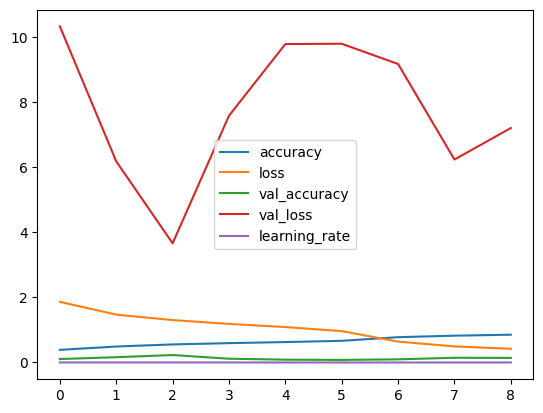

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2515 - loss: 3.5807
loss: 3.6633, accuracy: 0.2294


In [16]:
# 학습결과 시각화
pd.DataFrame(history.history).plot()
plt.show()

# 평가
loss, accuracy = model.evaluate(val_aug_images_path, val_aug_labels)
print(f'loss: {loss:.4f}, accuracy: {accuracy:.4f}')
